> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Medical Appointments  Show/No Shows Investagation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [92]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [93]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')

df.shape

(110527, 14)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [95]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [96]:
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [97]:
df.duplicated().sum()

0

In [98]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


After insepcting the data to check for duplication and missing values the data seems mostly clean. One thing I noticed that might need to be changed to make it easier to deal with dates is to change the data type of the dates; as they are not in datetime format. Which I believe would help with an idea that I have later on the analysis. 


Something that might need further insepction is that the age min value is -1! Thier might be some missing Age values in some of the rows. 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

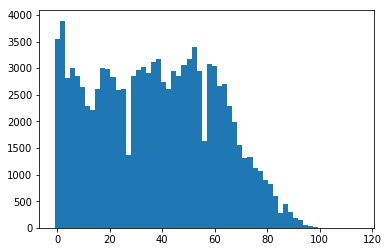

In [99]:
plt.hist(df["Age"],bins = 60);

In [100]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [101]:
 df[df.Age <= 0].count()

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
Hipertension      3540
Diabetes          3540
Alcoholism        3540
Handcap           3540
SMS_received      3540
No-show           3540
dtype: int64

Seems like there are 3540 rows with age less than or equal to 0 which is not possible. 

Since these rows account for a small percentage of the whole data I will just drop them. 

In [102]:
df.drop(df[df.Age <= 0].index, inplace=True)
df.shape

(106987, 14)

successfully droped

In [107]:
df.rename(columns={"No-show": "Show"}, inplace= True);
np.Show = np.where(df.Show == "No", 1,0)
df.Show.describe()

count     106987
unique         2
top           No
freq       85307
Name: Show, dtype: object

Changed the No-show values to numeric values, because it was confusing, where 1 values means showed, and 0 means no show. 
Numeric values should be easier to deal with in the future as well. 

In [90]:
df.head()
df.Show.describe()

count    106982.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Show, dtype: float64

In [49]:


date_test = df.ScheduledDay[0]
print(date_test)

2016-04-29T18:38:08Z


The date format that's in the data frame isn't in the right type, I also would like to change its format.  

In [50]:
print(date_test[:-4])
date_test = date_test[:-4]; 

2016-04-29T18:38


As I am not sure how to exactly convert this format to datetime I will test a few things on my test date.

In [51]:
print(date_test[:-6] + " " +  date_test[-5:])
date_test = date_test[:-6] + " " +  date_test[-5:]

2016-04-29 18:38


Now that I managed to get the "date_test" into an easier format to read for me, I will convert it to datetime. 

In [52]:
date_test = pd.to_datetime(date_test) 
type(date_test)

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
times = df.ScheduledDay.str[:-4]; 
times = times.str[:-6] + " " + times.str[-5:]
pd.to_datetime(times)
df.ScheduledDay = times
df.ScheduledDay = pd.to_datetime(df['ScheduledDay']);


Since all the operations i did on the test_date were general and not specific, I could apply the same idea to all the rest of the dates.
I learned how to slice the string in a whole column from this question https://stackoverflow.com/questions/36505847/substring-of-an-entire-column-in-pandas-dataframe. 

below I will do the same for the "AppointmentDay" column. 

In [54]:
times = df.AppointmentDay.str[:-4]; 
times = times.str[:-6] + " " + times.str[-5:]
pd.to_datetime(times)
df.AppointmentDay = times
df.AppointmentDay = pd.to_datetime(df['AppointmentDay']);

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106987 non-null float64
AppointmentID     106987 non-null int64
Gender            106987 non-null object
ScheduledDay      106987 non-null datetime64[ns]
AppointmentDay    106987 non-null datetime64[ns]
Age               106987 non-null int64
Neighbourhood     106987 non-null object
Scholarship       106987 non-null int64
Hipertension      106987 non-null int64
Diabetes          106987 non-null int64
Alcoholism        106987 non-null int64
Handcap           106987 non-null int64
SMS_received      106987 non-null int64
No-show           106987 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 17.2+ MB


The dates look more readble and are in the right format.

I noticed that the appointment dates don't have the time of the day included. Unlike the schedule date which has it include, which I can use later on the analysis. 

Note: I've learned after that I could immediately change the orignal format to datetime, but I believe this format looks more readable.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [56]:
df["time_before_appointment"] = (df.AppointmentDay - df.ScheduledDay).dt.days
df["time_before_appointment"] = df["time_before_appointment"] + 1
# I am adding 1 becuse the appointment day doesn't have the time of day included
# so the value after substracting should be greater unless the ScheduledDay time was at 00-00:00, it avoids -1 days. 


I want to see if there is a correlation between the new column I created and showing to an appointment. 

In [57]:
(df.time_before_appointment<0).sum() ## check for appointment day coming after the schedule which doesn't make sense. 

5

In [58]:
df.drop(df[df.time_before_appointment < 0].index, inplace=True)
df.shape

(106982, 15)

In [59]:
df.tail(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_before_appointment
110506,8.973883e+11,5758779,M,2016-06-01 11:09:00,2016-06-01,5,MARIA ORTIZ,0,0,0,0,0,0,No,0
110508,9.433654e+13,5757656,F,2016-06-01 09:41:00,2016-06-01,59,MARIA ORTIZ,0,0,0,0,0,0,No,0
110509,4.952968e+14,5786750,M,2016-06-08 08:50:00,2016-06-08,33,MARIA ORTIZ,0,0,0,0,0,0,No,0
110510,2.362182e+13,5757587,F,2016-06-01 09:35:00,2016-06-01,64,SOLON BORGES,0,0,0,0,0,0,No,0
110511,8.235996e+11,5786742,F,2016-06-08 08:50:00,2016-06-08,14,MARIA ORTIZ,0,0,0,0,0,0,No,0
110512,9.876246e+13,5786368,F,2016-06-08 08:20:00,2016-06-08,41,MARIA ORTIZ,0,0,0,0,0,0,No,0
110513,8.674778e+13,5785964,M,2016-06-08 07:52:00,2016-06-08,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,0
110514,2.695685e+12,5786567,F,2016-06-08 08:35:00,2016-06-08,58,MARIA ORTIZ,0,0,0,0,0,0,No,0
110515,6.456342e+14,5778621,M,2016-06-06 15:58:00,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,2
110516,6.923772e+13,5780205,F,2016-06-07 07:45:00,2016-06-08,37,MARIA ORTIZ,0,0,0,0,0,0,Yes,1


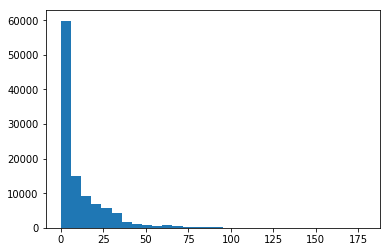

In [60]:
plt.hist(df["time_before_appointment"],bins  = 30  );

Seems like it's a right skewd histogram, with most appointments being in the same day of scheduling. 

### Research Question 2  (Replace this header name!)

In [159]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [160]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0